---
## Table of Contents
**[Introduction](#Introduction)**  <br><br>
**[Task 1: CDF function](#Task-1)**  
    1.1 [Implementation of the Custom CDF Function and Comparison with SciPy's CDF](#1.1)  
    1.2 [Calculation and Visualization of Absolute Errors](#1.2)  
    1.3 [Extended Analysis of Errors Across a Larger Range](#1.3)    <br><br>
**[Task 2: Option Pricing using your CDF function](#Task-2)**  
    2.1 [Option Pricing Functions](#2.1)  
    2.2 [Exploring the Sensitivity of Vanilla Option Prices to Input Parameters](#2.2)  
    2.3 [Principles of Option Pricing Table](#2.3)  
    2.4 [Analysis of Option Prices Under Varying Parameters](#2.4)  <br><br>
**[Task 3: Plotting option prices](#Task-3)**  
    3.1 [Plotting Eurpean and Binary Option Prices](#3.1)  
    3.2 [3D Visualization of Option Pricing Behavior](#3.2)  <br><br>
**[Conclusion](#Conclusion)**  <br><br>
**[References](#References)**  

---

## **Introduction** <a id="Introduction"></a>

This `ipynb` file includes the code, comments and explanations for the tasks to help the reader understand my way of thinking and the approach I followed to satisfy the criterias of the exercises. In the markdowns I have explained my solution and within the code cells you will find comments as well explaining the code line(s) below the comments. The structure for the solution of each task is as following:
1. Task title and description
2. Step titles and descriptions (multiple for each task)
3. Approach followed and code explanation
4. Observations and Output Analysis
5. Code cell with comments

This coursework focuses on implementing and analyzing methods for option pricing using Python. In financial mathematics, the cumulative distribution function (CDF) of the standard normal distribution $N(x)$ plays a crucial role in pricing derivatives, particularly in the Black-Scholes model. The approximation of $N(x)$ is achieved using a polynomial-based numerical scheme, which balances computational efficiency with accuracy. The tasks involve defining the $N(x)$ function, pricing European and binary options using the Black-Scholes formula, and exploring the impact of parameter variations on option prices. 

This coursework also emphasizes the application of programming to visualize and interpret the behavior of options under various conditions, providing valuable insights into financial decision-making.

**The libraries imported below will be utilized across the coursework**:
1. `pandas`: A Python library for data manipulation and analysis, offering tools for working with structured data like DataFrames and Series.
2. `numpy`: Provides support for numerical computations, including arrays, mathematical functions, and operations.
3. `matplotlib.pyplot`: Used for creating plots and visualizing data. 
4. `scipy.stats` : Provides statistical functions, including the standard normal distribution CDF and PDF (norm will be imported from stats which is a module of scipy).
5. `display`: Used to render rich outputs (such as DataFrames).

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import display

## Task 1: CDF Function <a id="Task-1"></a>
* Write a function called CDF() taking a single value x which is a standardised normal random variable.
* Use `CDF()` in a loop from $x \in [4; 4]$ and plot $N(x)$ on the vertical axis. You may use any plotting package. If anything other than matplotlib, make this clear.
* Compare the accuracy of your CDF with Python's built-in function norm.cdf() in SciPy

### 1.1 Implementation of the Custom CDF Function and Comparison with SciPy's CDF  <a id="1.1"></a>

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Approach Taken and Code Explanation </p>

In the code below, I first initialized the given constants required for the polynomial approximation of the cumulative distribution function (CDF) of a standard normal random variable. Then, I implemented a `custom CDF` function that uses this approximation for positive values of $x$ and the symmetry property $1 - N(-x)$ for negative values.  Using this function, I computed the custom CDF for values of $x \in [-4, 4] $ and compared it against the `CDF computed using SciPy’s built-in norm.cdf function`. Finally, I computed the absolute difference between the 2 functions, found the maximum error (maximum difference) and displayed it.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations from the plot </p>

The plot shows that the custom CDF (blue dashed line) and SciPy’s CDF (orange line) obviously being non-dicreasing functions as $x$  gets higher having a CDF of 1 when $x$ approaches the maximum values. The lines of the custom and SciPy's CDF appear to overlap across the all $x$, visually indicating that their output is the same. However, based on the maximum absolute error calculated $(7.45 \times 10^{-8})$, there are small deviations between the two functions, highlighting the limitations of the approximation. Further analysis is conducted below (section 1.2 and 1.3) to explore the characteristics and distribution of this error in greater detail.

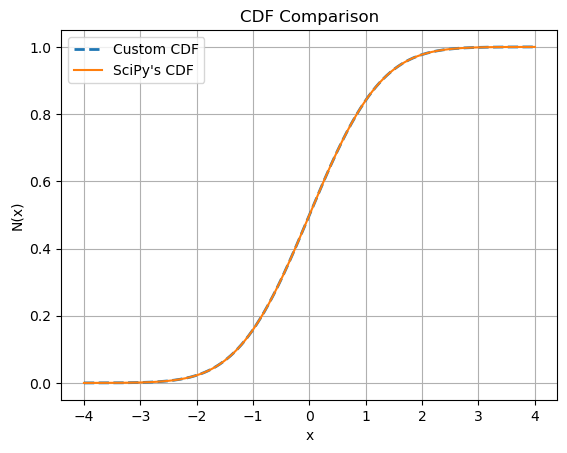

Maximum Absolute Error: 7.451615496867348e-08


In [2]:
# Initiliazation of constants
a1, a2, a3, a4, a5 = 0.319381530, -0.356563782, 1.781477937, -1.821255978, 1.330274429

def CDF(x):
    """
    Approximate the cumulative distribution function N(x) for a standard normal random variable.
    
    Parameters:
    - x (float): Input value where CDF is evaluated.
    
    Returns:
    - float: Cumulative probability N(x).
    """
    # Positive x: use polynomial approximation
    if x >= 0:
        # Scaling factor
        k = 1 / (1 + 0.2316419 * x)  
        # Standard normal PDF
        n = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)  
        N = 1 - n * (a1 * k + a2 * k**2 + a3 * k**3 + a4 * k**4 + a5 * k**5)
    
    # Negative x: use symmetry N(-x) = 1 - N(x)
    else:
        N = 1 - CDF(-x)
        
    return N


# Create x values from -4 to 4
x_values = np.linspace(-4, 4, 1000)
custom_cdf = [CDF(x) for x in x_values]
scipy_cdf = norm.cdf(x_values)

# Plot the custom CDF and scipy's CDF
plt.plot(x_values, custom_cdf, label='Custom CDF', linestyle='--', lw=2)
plt.plot(x_values, scipy_cdf, label="SciPy's CDF", linestyle='-')
plt.title('CDF Comparison')
plt.xlabel('x')
plt.ylabel('N(x)')
plt.legend()
plt.grid()
plt.show()

# Calculate and print the maximum absolute error
max_error = np.max(np.abs(np.array(custom_cdf) - scipy_cdf))
print(f"Maximum Absolute Error: {max_error}")

### 1.2 Calculation and Visualization of Absolute Errors <a id="1.2"></a>

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Approach Taken and Code Explanation </p>

This code computes the **absolute error** ($|Custom$ $CDF(x) - SciPy$ $CDF(x)|$) between the custom CDF and SciPy's `norm.cdf` for a given range of [-4,4] $x$-values. It identifies the indices of the two highest absolute error values using `np.argsort`, extracts their corresponding $x$-coordinates and error values, and highlights these points in red on a plot of the absolute error curve. The plot visualizes how the error varies across $x$, with the 2 maximum error points marked with red dots. Additionally, the $x$-values and error values for the top two errors are displayed. Finally, the total error between this range of the the custom and the SciPy's CDFs has been computed and display too.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations from the plot </p>

The plot shows the absolute error between the custom CDF and SciPy's norm.cdf across $x \in [-4,4]$. According to the plot, the error oscillates symmetrically, with the 2 highest errors occuring at $x = -0.71671672$ and $x = 0.71671672$ both having a value of $7.451615 \times 10^{-8}$ (highlited in red). The overall error remains very small, indicating that the custom CDF closely approximates the SciPy implementation. The oscillatory behavior reflects the polynomial approximation's minor deviations, where the accuracy is potentially sufficient for most practical applications as the error seems to be very small. Lastly, the total error within the range $[-4,4]$ has been calculated as approximately $4.42 \times 10^{-5}$, highlighting the cumulative deviation of the custom CDF from SciPy's function over the entire range.

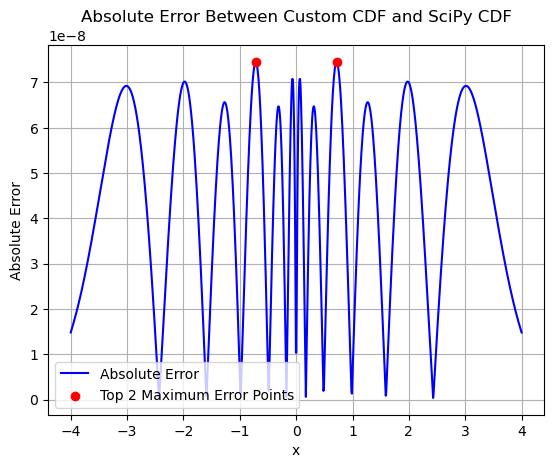

X-values for the top 2 highest errors:  [-0.71671672  0.71671672]
Absolute error for the top 2 highest errors:  [7.45161550e-08 7.45161549e-08]
Total absolute error across the range:  4.4186732638796954e-05


In [3]:
# Calculate absolute error
absolute_error = np.abs(custom_cdf - scipy_cdf)

# Find the two highest absolute error values and their indices
top_2_indices = np.argsort(absolute_error)[-2:][::-1]  
top_2_x_values = x_values[top_2_indices]
top_2_y_values = absolute_error[top_2_indices]

# Total Error within the range
total_error = np.sum(absolute_error)

# Plot the absolute error
plt.figure()
plt.plot(x_values, absolute_error, label='Absolute Error', color='blue')
plt.scatter(top_2_x_values, top_2_y_values, color='red', zorder=3, label='Top 2 Maximum Error Points')
plt.title('Absolute Error Between Custom CDF and SciPy CDF')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid()
plt.show()

# Output the top 2 x-values and error values
print("X-values for the top 2 highest errors: ", top_2_x_values)
print("Absolute error for the top 2 highest errors: ", top_2_y_values)
print("Total absolute error across the range: ", total_error)

### 1.3 Extended Analysis of Errors Across a Larger Range <a id="1.3"></a>

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Approach Taken and Code Explanation </p>

In this section, the code below extends the analysis of the absolute error between the custom CDF and SciPy's CDF over a larger range of $x \in [-10,10]$. It computes the absolute error across this range and visualizes the error distribution in a plot, with the range $[−4,4]$ highlighted for emphasis. The total absolute error over the extended range is calculated, as well as the cumulative error specifically within the highlighted range. Finally, the percentage of the total error contributed by the range $[−4,4]$ is computed and displayed, providing insight into how much of the overall deviation occurs within this narrower domain. Additionally, the error percentage is calculated for the range $[−5.6,5.6]$, trying to capture the 100% of the error.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations from the plot </p>

The error is highly concentrated within the highlighted range of $[−4,4]$, where oscillations occur due to the polynomial approximation's limitations. Outside this range, the error rapidly approaches zero (especially after approximate range [-5,5] as observed in the plot) as $x$ moves farther into the tails, reflecting the diminishing values of the normal distribution CDF and the high accuracy of the approximation in these regions. 

From a mathematical perspective, 97.42% of the total absolute error falls within the range 
$[−4,4]$, confirming that the approximation is most significant in this central region. Furthermore, within the range $[−5.6,5.6]$, it appears that nearly 100% of the total error is captured. This indicates that the approximation error is entirely concentrated within this range, demonstrating the high accuracy of the custom CDF implementation for values of $x$ outside this interval.

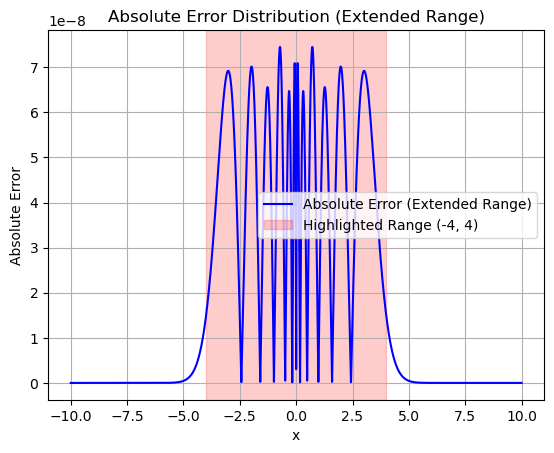

Percentage of total error within [-4, 4]: 97.42%
Percentage of total error within [-5.6, 5.6]: 100.00%


In [4]:
# Extend x_values to a larger range (-10 to 10) for analysis
extended_x_values = np.linspace(-10, 10, 10000)
# Custom CDF for extended values
custom_cdf_extended = [CDF(x) for x in extended_x_values]
# SciPy's CDF for extended values 
scipy_cdf_extended = norm.cdf(extended_x_values)
# Absolute error for extended values (between custom and SciPy's CDFs)
absolute_error_extended = np.abs(np.array(custom_cdf_extended) - scipy_cdf_extended)
# Calculate the total error for the extended range
total_error_extended = np.sum(absolute_error_extended)

# Calculate and plot error distribution
plt.figure()
plt.plot(extended_x_values, absolute_error_extended, label='Absolute Error (Extended Range)', color='blue')
plt.axvspan(-4, 4, color='red', alpha=0.2, label='Highlighted Range (-4, 4)')
plt.title('Absolute Error Distribution (Extended Range)')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid()
plt.show()

# Error % for range [-4,4]
error_within_highlighted_range = np.sum(absolute_error_extended[(extended_x_values >= -4) & (extended_x_values <= 4)])
error_percentage_extended = (error_within_highlighted_range / total_error_extended) * 100

# Error % for range [-5.6,5.6]
error_within_highlighted_range = np.sum(absolute_error_extended[(extended_x_values >= -5.6) & (extended_x_values <= 5.6)])
error_percentage_extended_five_point_six = (error_within_highlighted_range / total_error_extended) * 100

# Output error percentage within the highlighted range (-4 to 4) for extended range
print(f"Percentage of total error within [-4, 4]: {error_percentage_extended:.2f}%")
# Output error percentage within the highlighted range (-5.6 to 5.6) for extended range
print(f"Percentage of total error within [-5.6, 5.6]: {error_percentage_extended_five_point_six:.2f}%")

----------

## Task 2: Option Pricing using your CDF function <a id="Task-2"></a>
* This task involves producing an option pricing calculator using the Black-Scholes formula given in the relevant lecture.
* Write functions to price calls and puts for Europeans and binaries. Input values should be entered using the keyboard by the user and an example set is:  
- Stock Price **( S )**: 100  
- Strike Price **( E )**: 100  
- Current Time **( t )**: 0  
- Expiry **(T )**: 1 year  
- Volatility **( $\sigma$ )**: 20%  
- Risk-Free Rate **( r )**: 5%  
- Dividend Yield **( D )**: 0  
* Focusing on vanilla calls and puts, change input values (one at a time) and experiment with how these affect option prices. You may include in a table and present a discussion of your observations.

### 2.1 Option Pricing Functions <a id="2.1"></a>

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Approach Taken and Code Explanation </p>

**`black_scholes` Function**:
This function calculates the price of European call or put options using the Black-Scholes formula. These calculations rely on key mathematical formulations such as $d_1$ and $d_2$ from the **Black-Scholes [2]** model:
$$
d_1 = \frac{\ln\left(\frac{S}{E}\right) + \left(r - D + \frac{\sigma^2}{2}\right)(T-t)}{\sigma \sqrt{T-t}}, \quad
d_2 = d_1 - \sigma \sqrt{T-t}
$$

Where the function takes as **inputs**:
- $S$: Current stock price  
- $E$: Strike price  
- $T$: Time to maturity  
- $t$: Current time
- $r$: Risk-free interest rate  
- $\sigma$: Volatility  
- $D$: Dividend  

The function computes $d_1$ and $d_2$ (key parameters in the Black-Scholes model) based on the inputs. Depending on the **option_type**, it returns the price of either the call or put option using the cumulative distribution function of the standard normal distribution. An error is raised for invalid option types. Option price calculation:

* **Eurpean Call Option Price** 
$$ C = S \cdot N (d_1) - E \cdot e^{-r(T-t)} \cdot N (d_2) \quad $$

* **Eurpean Put Option Price** 
$$ P = E \cdot e^{-r(T-t)} \cdot N (-d_2) - S \cdot N (-d_1) $$

* **Binary Call Option Price** 
$$ C = e^{-r  (T-t)} \cdot N (d_2) $$

* **Binary Put Option Price** 
$$ P = e^{-r  (T-t)} \cdot (1 - N (d_2)) $$

Where $N$ represents the CDF of the standard normal distribution and where presented in the code the custom CDF fuction has been utilised. 

Finaly, calls and puts for both European and Binary options are being computed by using the `black_scholes` and `binary_option` functions and arguments that have been initialised are passed as arguments to the function. The options prices have been printed and displayed in a 4 decimal format. <br> <br>

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations from the output </p>

Using the functions to compute Option Prices for Europeans and Binary calls and puts by setting the following **input values** (values are given by the description of the task):
* $S$ = 100       
* $E$ = 100       
* $T$ = 1   
* $t$ = 0
* $r$ = 0.05 
* $\sigma$ = 0.2
* $D$ = 0
* $Option Type$: "call" or "put"   
<br> <br>

**Option Prices Based on the functions**:
* `European Call` Option Price: 10.4506  
* `European Put` Option Price: 5.5735  
* `Binary Call` Option Price: 0.5323  
* `Binary Put` Option Price: 0.4189  <br> <br>

**Confirm the Put values with the Put-Call Parity formulas**  
* `Put-Call Parity Formula for European Options`: 
$$ P = C + E \times e^{-rT} - S $$ 
$$ P = 10.4506 + 100 \times e^{-0.05}- 100 $$
$$ P = 10.4506 + 95.1229 - 100 $$
$$ P = 5.5735 $$ <br>

* `Put-Call Parity Formula for Binary Options`:   
$$ C + P = e^{-rT} $$
$$ P = 0.9512 - 0.5323 $$
$$ P = 0.4189 $$ 


In [5]:
def black_scholes(S: float, E: float, T: float, t: float, r: float, sigma: float, D: float, option_type: str):
    """
    Calculate the Black-Scholes price for European options (call or put), considering continuous dividend yield.
    
    Parameters:
    - S (float): Current stock price
    - E (float): Strike price
    - T (float): Time to maturity (expiry time in years)
    - t (float): Current time in years
    - r (float): Risk-free interest rate (annual)
    - sigma (float): Volatility (standard deviation of stock's return)
    - D (float): Dividend yield (annual)
    - option_type (str): "call" for call option, "put" for put option
    
    Returns:
    - float: Option price
    """
    to = T - t  # Time to maturity

    # Validate time to maturity
    if to <= 0:
        raise ValueError("Time to maturity (T - t) must be positive.")

    # Calculate d1 using the Black-Scholes formula
    d1 = (np.log(S / E) + (r - D + 0.5 * sigma**2) * to) / (sigma * np.sqrt(to))
    # Calculate d2, which is d1 adjusted by volatility and time
    d2 = d1 - sigma * np.sqrt(to)
    
    # Black-Scholes formula for European call option price
    if option_type == "call":
        return S * np.exp(-D * to) * CDF(d1) - E * np.exp(-r * to) * CDF(d2)
    
    # Black-Scholes formula for European put option price
    elif option_type == "put":
        return E * np.exp(-r * to) * CDF(-d2) - S * np.exp(-D * to) * CDF(-d1)
    
    # Raise an error if the option type is neither "call" nor "put"
    else:
        raise ValueError("Incorrect input, option_type must be 'call' or 'put'")


def binary_option(S: float, E: float, T: float, t: float, r: float, sigma: float, D: float, option_type: str):
    """
    Calculate the price of a binary call or put option, considering continuous dividend yield.
    
    Parameters:
    - S (float): Current stock price
    - E (float): Strike price
    - T (float): Time to maturity (expiry time in years)
    - t (float): Current time in years
    - r (float): Risk-free interest rate (annual)
    - sigma (float): Volatility (standard deviation of stock's return)
    - D (float): Dividend yield (annual)
    - option_type (str): "call" for binary call, "put" for binary put
    
    Returns:
    - float: Binary option price
    """
    to = T - t  # Time to maturity

    # Validate time to maturity
    if to <= 0:
        raise ValueError("Time to maturity (T - t) must be positive.")

    # Calculate d2 for Black-Scholes formula
    d2 = (np.log(S / E) + (r - D - 0.5 * sigma**2) * to) / (sigma * np.sqrt(to))
    
    if option_type == "call":
        # Return binary call option price using risk-neutral probability
        return np.exp(-r * to) * CDF(d2)
    
    elif option_type == "put":
        # Return binary put option price using risk-neutral probability
        return np.exp(-r * to) * CDF(-d2)
    
    else:
        # Raise an error for invalid option type input
        raise ValueError("Incorrect input, option_type must be 'call' or 'put'")

In [6]:
# Input values
S = 100       # Current stock price
E = 100       # Strike price
T = 1         # Time to expiry (in years)
t = 0         # Current time
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility
D = 0         # Dividend

# Calculate option prices with Black-Scholes
call_price = black_scholes(S, E, T, t, r, sigma, D, "call")
put_price = black_scholes(S, E, T, t, r, sigma, D, "put")

print(f"European Call Option Price: {call_price:.4f}")
print(f"European Put Option Price: {put_price:.4f}")

# Calculate option prices with Black-Scholes
b_call_price = binary_option(S, E, T, t, r, sigma, D, "call")
b_put_price = binary_option(S, E, T, t, r, sigma, D, "put")

print(f"Binary Call Option Price: {b_call_price:.4f}")
print(f"Binary Put Option Price: {b_put_price:.4f}")

European Call Option Price: 10.4506
European Put Option Price: 5.5735
Binary Call Option Price: 0.5323
Binary Put Option Price: 0.4189


### 2.2 Exploring the Sensitivity of Vanilla Option Prices to Input Parameters <a id="2.2"></a>

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Approach Taken and Code Explanation </p>

Using the Black-Scholes model with continuous dividend yield, I am methodically examining how different factors affect European option pricing. I calculate the relevant call and put option pricing by repeatedly changing variables including the stock price, strike price, volatility, time to maturity, risk-free interest rate, and dividend yield. A clear comparison analysis is then provided by visualizing these correlations in subplots, each of which is devoted to a single parameter. To illustrate how these factors interact and affect option valuation, the charts show the crossing locations where call and put prices converge (where relevant). Understanding how each parameter influences possibilities within the Black-Scholes framework is made easier with the help of this organized representation.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations from the output </p>

1. `Option Prices vs Stock Prices`:
* **Call:** The call option price increases as the stock price rises, reflecting the higher intrinsic value for the holder.
* **Put:** The put option price decreases as the stock price rises, as the likelihood of the strike being in the money diminishes.

2. `Option Prices vs Strike Price`:
* **Call:** The call option price decreases with increasing strike price, as it becomes less likely to exceed the higher strike.
* **Put:** The put option price increases with increasing strike price, reflecting greater protection against downward moves.

3. `Option Prices vs Volatility`:
* **Call:** The call option price rises with volatility due to greater uncertainty and potential upside.
* **Put:** The put option price also rises with volatility, as uncertainty increases the likelihood of significant downward movements.

4. `Option Prices vs Time to Maturity`:
* **Call:** The call option price increases with time to maturity, allowing more time for the stock to rise.
* **Put:** The put option price decreases with time to maturity, as the underlying price has more time to rise.

5. `Option Prices vs Interest Rate`:
* **Call:** The call option price increases with rising interest rates due to the higher opportunity cost of holding cash instead of the option.
* **Put:** The put option price decreases as interest rates rise, reflecting the reduced present value of the strike price.

6. `Option Prices vs Dividend:`:
* **Call:** The call option price decreases with higher dividends since the stock price is expected to drop after the dividend payout.
* **Put:** The put option price increases with higher dividends, benefiting from the anticipated stock price drop.

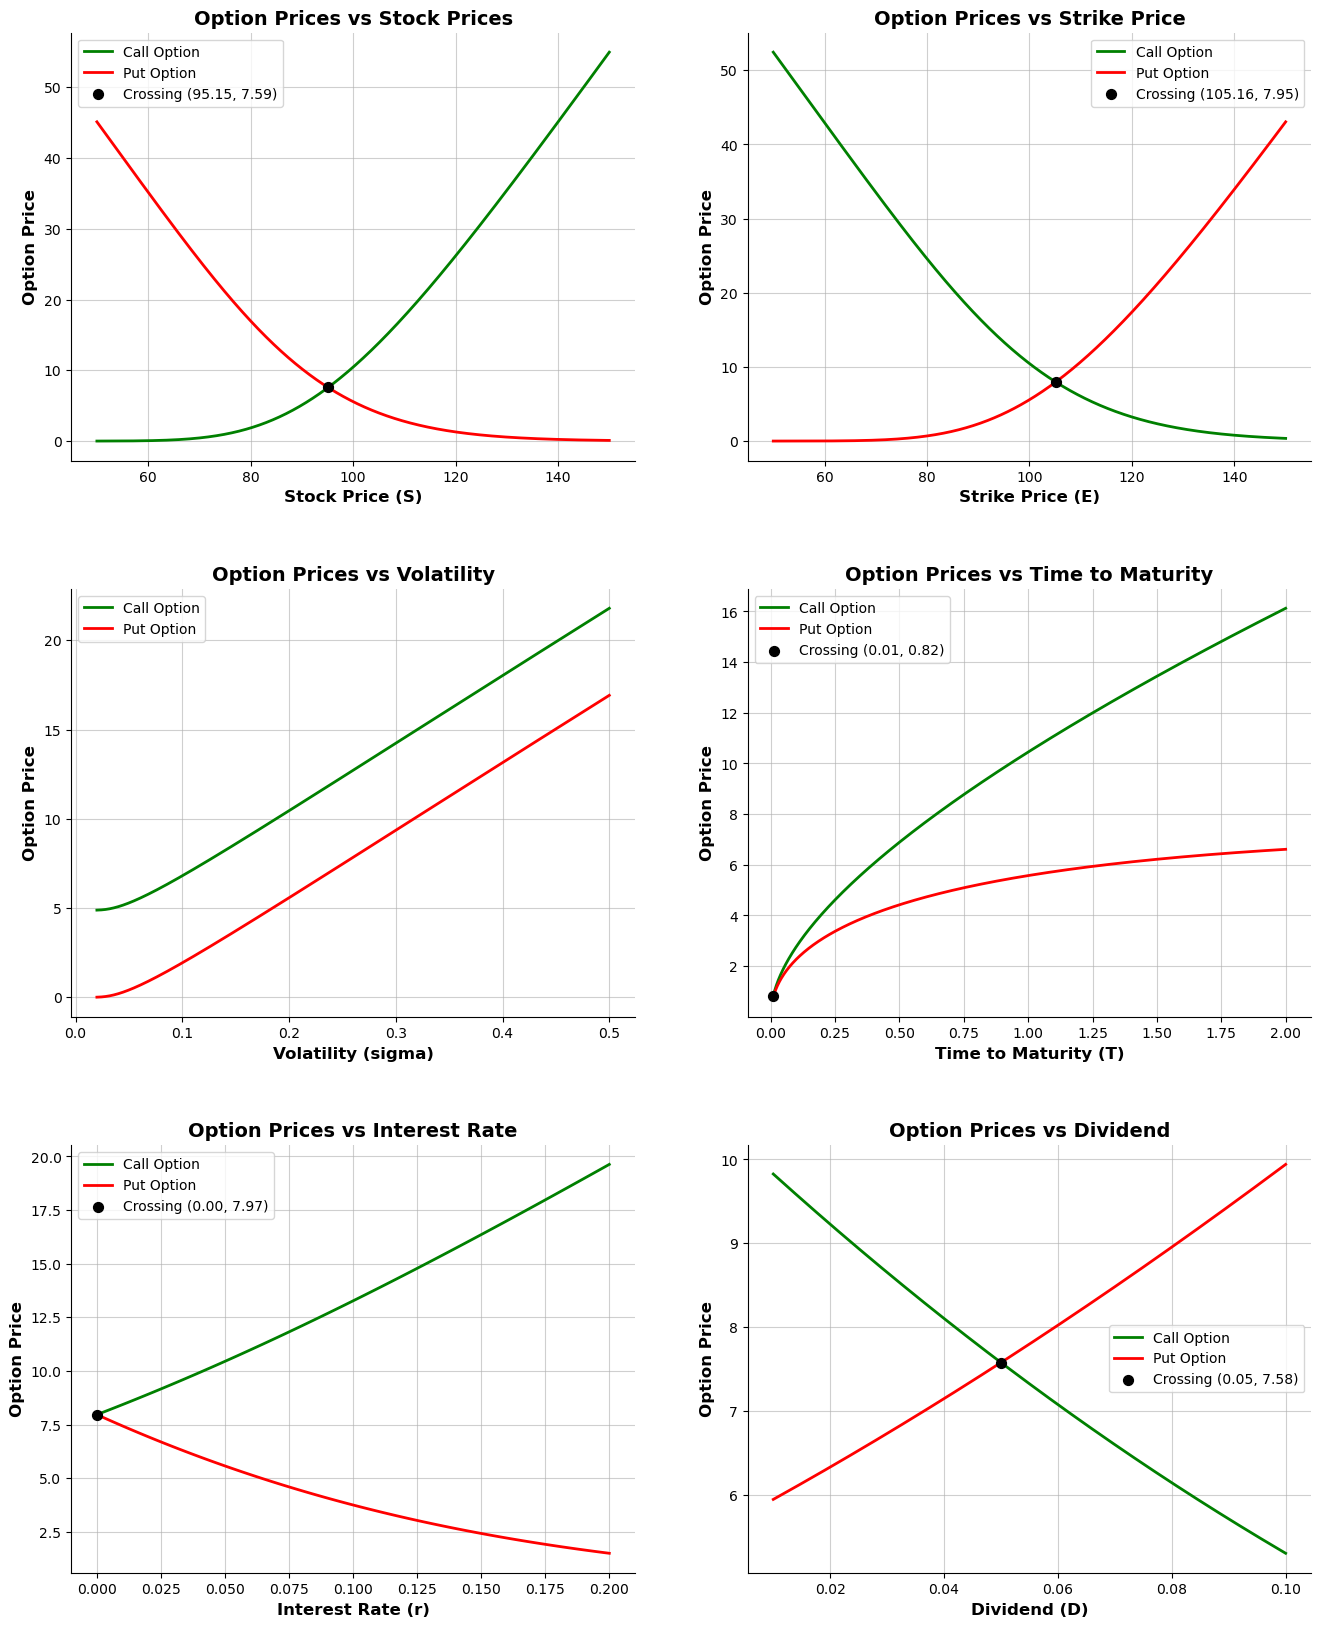

In [7]:
def plot_option_prices_subplot(ax, x_values, call_prices, put_prices, x_label, title, show_crossing=True):
    """Plot option prices in a subplot and optionally highlight crossing points."""
    ax.plot(x_values, call_prices, "g-", label="Call Option", linewidth=2)
    ax.plot(x_values, put_prices, "r-", label="Put Option", linewidth=2)
    
    if show_crossing:
        # Find and plot crossing point
        cross_index = np.argmin(np.abs(np.array(call_prices) - np.array(put_prices)))
        cross_x = x_values[cross_index]
        cross_y = call_prices[cross_index]
        ax.scatter(cross_x, cross_y, color="black", zorder=5, s=50, label=f"Crossing ({cross_x:.2f}, {cross_y:.2f})")
    
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel(x_label, fontsize=12, fontweight="bold")
    ax.set_ylabel("Option Price", fontsize=12, fontweight="bold")
    ax.legend(fontsize=10)
    ax.grid(alpha=0.6)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# Stock Prices
stock_prices = np.linspace(50, 150, 1000)
call_prices_stock = [black_scholes(S, E, T, t, r, sigma, D, "call") for S in stock_prices]
put_prices_stock = [black_scholes(S, E, T, t, r, sigma, D, "put") for S in stock_prices]

# Strike Prices
strike_prices = np.linspace(50, 150, 1000)
call_prices_strike = [black_scholes(100, E, T, t, r, sigma, D, "call") for E in strike_prices]
put_prices_strike = [black_scholes(100, E, T, t, r, sigma, D, "put") for E in strike_prices]

# Volatilities
volatilities = np.linspace(0.02, 0.5, 1000)
call_prices_vol = [black_scholes(100, E, T, t, r, sigma, D, "call") for sigma in volatilities]
put_prices_vol = [black_scholes(100, E, T, t, r, sigma, D, "put") for sigma in volatilities]

# Time to Maturity
times_to_maturity = np.linspace(0.01, 2, 1000)
call_prices_time = [black_scholes(100, E, T, t, r, sigma, D, "call") for T in times_to_maturity]
put_prices_time = [black_scholes(100, E, T, t, r, sigma, D, "put") for T in times_to_maturity]

# Risk-Free Rates
risk_free_rates = np.linspace(0, 0.2, 100)
call_prices_r = [black_scholes(100, E, T, t, r, sigma, D, "call") for r in risk_free_rates]
put_prices_r = [black_scholes(100, E, T, t, r, sigma, D, "put") for r in risk_free_rates]

# Dividend
dividend = np.linspace(0.01, 0.1, 1000)
call_prices_dividend = [black_scholes(100, E, T, t, r, sigma, D, "call") for D in dividend]
put_prices_dividend = [black_scholes(100, E, T, t, r, sigma, D, "put") for D in dividend]

# Plot subplots with improved formatting
fig, axs = plt.subplots(3, 2, figsize=(16, 20), gridspec_kw={'hspace': 0.3, 'wspace': 0.2})

# Option Values vs Stock Prices
plot_option_prices_subplot(axs[0, 0], stock_prices, call_prices_stock, put_prices_stock, 
                            "Stock Price (S)", "Option Prices vs Stock Prices") 
# Option Values vs Strike Prices
plot_option_prices_subplot(axs[0, 1], strike_prices, call_prices_strike, put_prices_strike,
                            "Strike Price (E)", "Option Prices vs Strike Price")
# Option Values vs Volatility
plot_option_prices_subplot(axs[1, 0], volatilities, call_prices_vol, put_prices_vol, 
                            "Volatility (sigma)", "Option Prices vs Volatility", show_crossing=False)
# Option Values vs Time to Maturity
plot_option_prices_subplot(axs[1, 1], times_to_maturity, call_prices_time, put_prices_time, 
                            "Time to Maturity (T)", "Option Prices vs Time to Maturity")
# Option Values vs Interest Rates plot
plot_option_prices_subplot(axs[2, 0], risk_free_rates, call_prices_r, put_prices_r, 
                            "Interest Rate (r)", "Option Prices vs Interest Rate")
# Option Values vs Dividens
plot_option_prices_subplot(axs[2, 1], dividend, call_prices_dividend, put_prices_dividend, 
                            "Dividend (D)", "Option Prices vs Dividend")
plt.show()

### 2.3 Principles of Option Pricing Table <a id="2.3"></a>

Summary of factors that impact option values **[1]** :

<table style="width:80%; font-size:18px; border:1px solid black; text-align:center;">
    <tr>
        <th style="border:1px solid black;">An increase in…</th>
        <th style="border:1px solid black;">Calls</th>
        <th style="border:1px solid black;">Puts</th>
    </tr>
    <tr>
        <td style="border:1px solid black;">Underlying</td>
        <td style="border:1px solid black; color:green;">rise</td>
        <td style="border:1px solid black; color:red;">fall</td>
    </tr>
    <tr>
        <td style="border:1px solid black;">Strike</td>
        <td style="border:1px solid black; color:red;">fall</td>
        <td style="border:1px solid black; color:green;">rise</td>
    </tr>
    <tr>
        <td style="border:1px solid black;">Volatility</td>
        <td style="border:1px solid black; color:green;">rise</td>
        <td style="border:1px solid black; color:green;">rise</td>
    </tr>
    <tr>
        <td style="border:1px solid black;">Time to expiry</td>
        <td style="border:1px solid black; color:green;">rise</td>
        <td style="border:1px solid black; color:red;">fall</td>
    </tr>
    <tr>
        <td style="border:1px solid black;">Interest rates</td>
        <td style="border:1px solid black; color:green;">rise</td>
        <td style="border:1px solid black; color:red;">fall</td>
    </tr>
    <tr>
        <td style="border:1px solid black;">Dividends</td>
        <td style="border:1px solid black; color:red;">fall</td>
        <td style="border:1px solid black; color:green;">rise</td>
    </tr>
</table>


<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations and discussion of the table </p>

The factors influencing call and put option prices are summarized in the table, while the plots in Section 2.2 visually illustrate their impact. Call options increase in value and put options decrease, representing shifts in intrinsic value as the underlying price rises. On the other hand, because higher strike prices improve the intrinsic value of puts and decrease the payoff potential of calls, they result in greater put values and lower call values. Because volatility increases uncertainty and raises option premiums, it has a beneficial effect on both call and put prices. Because time erosion impacts calls and puts differently, time to expiry increases the value of calls while decreasing the value of puts. Higher interest rates have a negative effect on puts and favor calls by decreasing the strike's present value. Finally, because dividends lower the stock price, they raise put values and decrease call values. These relationships highlight the sensitivity of options to key variables.

### 2.4 Analysis of Option Prices Under Varying Parameters <a id="2.4"></a>

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Approach Taken and Code Explanation </p>

This section displays further analysis and systematically examines the effects of several factors on European call and put option pricing such as: stock price, strike price, volatility, time to maturity, risk-free rate, and dividend yield. The code below calculates matching option prices for each parameter across a range of values (the values and the range have been predifined in Section 2.2), saves them in DataFrames and displays them. 

Please note that all other parameters remain fixed as predefined in Section 2.1, while only one parameter is varied incrementally to analyze its impact on option prices.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations from the DataFrames </p>

The DataFrames give a detailed analysis of how changes in one characteristic affect option pricing while holding other factors constant. In combination with the plots from Section 2.2 they provide a clear understanding of the link between these variables by displaying the generated call and put option prices next to the different parameter values. This presentation highlights important trends and behaviors in the pricing model and enables a thorough examination of the effects of changes in the stock price, strike price, volatility, time to maturity, risk-free rate, and dividend yield on option valuation.

In [8]:
# Stock Prices DataFrame
stock_prices_df = pd.DataFrame({"Stock Price (S)": stock_prices, "Call Option Price": call_prices_stock, "Put Option Price": put_prices_stock})

# Strike Prices DataFrame
strike_prices_df = pd.DataFrame({"Strike Price (E)": strike_prices, "Call Option Price": call_prices_strike,"Put Option Price": put_prices_strike})

# Volatilities DataFrame
volatilities_df = pd.DataFrame({"Volatility (σ)": volatilities, "Call Option Price": call_prices_vol, "Put Option Price": put_prices_vol})

# Time to Maturity DataFrame
times_to_maturity_df = pd.DataFrame({"Time to Maturity (T)": times_to_maturity, "Call Option Price": call_prices_time, "Put Option Price": put_prices_time})

# Risk-Free Rates DataFrame
risk_free_rates_df = pd.DataFrame({"Risk-Free Rate (r)": risk_free_rates, "Call Option Price": call_prices_r, "Put Option Price": put_prices_r})

# Dividend DataFrame
dividend_df = pd.DataFrame({"Dividend (D)": dividend, "Call Option Price": call_prices_dividend, "Put Option Price": put_prices_dividend})

# Display all DataFrames
display(strike_prices_df, stock_prices_df, volatilities_df, times_to_maturity_df, risk_free_rates_df, dividend_df)

,Strike Price (E),Call Option Price,Put Option Price
0,50.0000,52.438861,0.000333
1,50.1001,52.343658,0.000347
2,50.2002,52.248455,0.000362
3,50.3003,52.153252,0.000378
4,50.4004,52.058050,0.000394
...,...,...,...
995,149.5996,0.371329,42.674870
996,149.6997,0.368373,42.767132
997,149.7998,0.365439,42.859416
998,149.8999,0.362527,42.951722


,Stock Price (S),Call Option Price,Put Option Price
0,50.0000,0.002397,45.125340
1,50.1001,0.002491,45.025333
2,50.2002,0.002587,44.925330
3,50.3003,0.002687,44.825329
4,50.4004,0.002790,44.725332
...,...,...,...
995,149.5996,54.573292,0.096635
996,149.6997,54.672491,0.095734
997,149.7998,54.771698,0.094841
998,149.8999,54.870914,0.093956


,Volatility (σ),Call Option Price,Put Option Price
0,0.020000,4.880966,0.003909
1,0.020480,4.881851,0.004793
2,0.020961,4.882868,0.005811
3,0.021441,4.884027,0.006970
4,0.021922,4.885337,0.008279
...,...,...,...
995,0.498078,21.720475,16.843417
996,0.498559,21.738507,16.861450
997,0.499039,21.756539,16.879482
998,0.499520,21.774570,16.897512


,Time to Maturity (T),Call Option Price,Put Option Price
0,0.010000,0.822917,0.772930
1,0.011992,0.903769,0.843827
2,0.013984,0.978540,0.908645
3,0.015976,1.048495,0.968647
4,0.017968,1.114512,1.024712
...,...,...,...
995,1.992032,16.085819,6.605616
996,1.994024,16.096065,6.606847
997,1.996016,16.106307,6.608075
998,1.998008,16.116547,6.609301


,Risk-Free Rate (r),Call Option Price,Put Option Price
0,0.000000,7.965579,7.965579
1,0.002020,8.058854,7.857038
2,0.004040,8.152749,7.749523
3,0.006061,8.247261,7.643033
4,0.008081,8.342388,7.537564
...,...,...,...
95,0.191919,19.091486,1.628842
96,0.193939,19.225808,1.596590
97,0.195960,19.360318,1.564863
98,0.197980,19.495011,1.533653


,Dividend (D),Call Option Price,Put Option Price
0,0.01000,9.826286,5.944245
1,0.01009,9.820775,5.947653
2,0.01018,9.815267,5.951063
3,0.01027,9.809761,5.954474
4,0.01036,9.804256,5.957887
...,...,...,...
995,0.09964,5.316068,9.922656
996,0.09973,5.312472,9.927214
997,0.09982,5.308878,9.931773
998,0.09991,5.305285,9.936334


----------

## Task 3: Plotting option prices <a id="Task-3"></a>
* Using the results in Task 2, plot the option price $V (S)$ against varying stock $S$. This should be for some time prior to expiry $ t < T $
* On the same axis include the payoff function for the option
* You are expected to present a total of four plots: One each for European call & put and binary call and put. 

### 3.1 Plotting Eurpean and Binary Option Prices <a id="3.1"></a>

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Approach Taken and Code Explanation </p>

The code below plots the option prices (**`plot_options`** function) $V(S)$ against a varying stock price $S$ for both European and binary options (call and put) while including their respective payoff functions. Using the Black-Scholes and custom binary option pricing functions, the code calculates the prices for a range of stock prices $S \in [50, 150]$ at different times prior to expiry ($t$ which are passed as an argument whiel calling the function) with fixed parameters for strike price $E=100$, risk-free rate $r=0.05$, and volatility $\sigma=0.2$. The results are visualized in four subplots: the European call and put are shown on the top row, and the binary call and put are on the bottom row. Each subplot includes the option price curve(s) and its payoff function, highlighting their relationships and how option prices vary with the underlying stock price.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations from the plots </p>


**`European Options:`**  
As $S$ rises above the strike price $E = 100$, the call option value increases linearly, reflecting its payoff at maturity, while the put option value decreases. Conversely, as $S$ falls below $E$, the call value approaches zero, and the put value increases due to positive intrinsic value.

1. **European Call Option**: Payoff: $max(S-E,0)$ and its value can be calculated with Black-Scholes.
    * As $S$ increases above $E$, the option value rises linearly with $S$, reflecting the intrinsic value gain.
    * As $S$ decreases below $E$, the option value approaches zero since the option becomes worthless at expiry. <br> <br> 

2. **European Put Option**: Payoff: $max(E-S,0)$ and its value can be calculated with Black-Scholes.
    * As $S$ increases above $E$, the option value diminishes as it becomes out-of-the-money.
    * As $S$ decreases below $E$, the option value increases linearly, reflecting the difference between $E$ and $S$ as it becomes in-the-money. <br> <br> 

**`Binary Options:`**  
The price curves approach their respective payoff levels of 1 or 0, consistent with their all-or-nothing nature. Binary Call Options become more valuable as $S$ rises above $E$, while Binary Put Options gain value as $S$ falls below $E$.

3. **Binary Call Option**: This pays out one unit of cash if the spot is above the strike at maturity otherwise it pays out nothing. Its value now is given by: $C = e^{-r(T-t)} \times N(d_2)$  
    * As $S$ increases above $E$, the price sharply converges to 1, reflecting the payoff of the option being exercised.
    * As $S$ decreases below $E$, the price converges to 0, indicating no payoff. <br> <br> 

4. **Binary Put Option**: This pays out one unit of cash if the spot is below the strike at maturity otherwise it pays out nothing. Its value now is given by: $P = e^{-r(T-t)} \times N(-d_2)$  
    * As $S$ decreases below $E$, the price sharply converges to 1, reflecting the payoff of the option being exercised.
    * As $S$ increases above $E$, the price converges to 0, indicating no payoff. <br> <br>

These plots highlight the behavior of each type of option under varying stock prices, demonstrating how their values are sensitive to $S$ relative to $E$.

The European and Binary options (calls and puts) subplots demonstrate that **the closer the option's expiration date is, the more closely the option price matches its payoff** (the highest small $t$ is the closer it gets to expiration). The charts below, for example, use the same parameters but various current times $t$, which results in distinct $(T-t)$ values, to show the link between the payout and option prices. These illustrations make it abundantly evident that the price of an option converges to the payoff as it gets closer to expiration, illustrating the decreasing influence of time and volatility on pricing. To compare the relationship between being closer to expiry and being farther from it, $t$ has been set to 0.25, 0.5, and 0.75 in this instance. This makes it possible to clearly see how option prices change as the time to expiry gets shorter, emphasizing how prices converge near their various payout values.

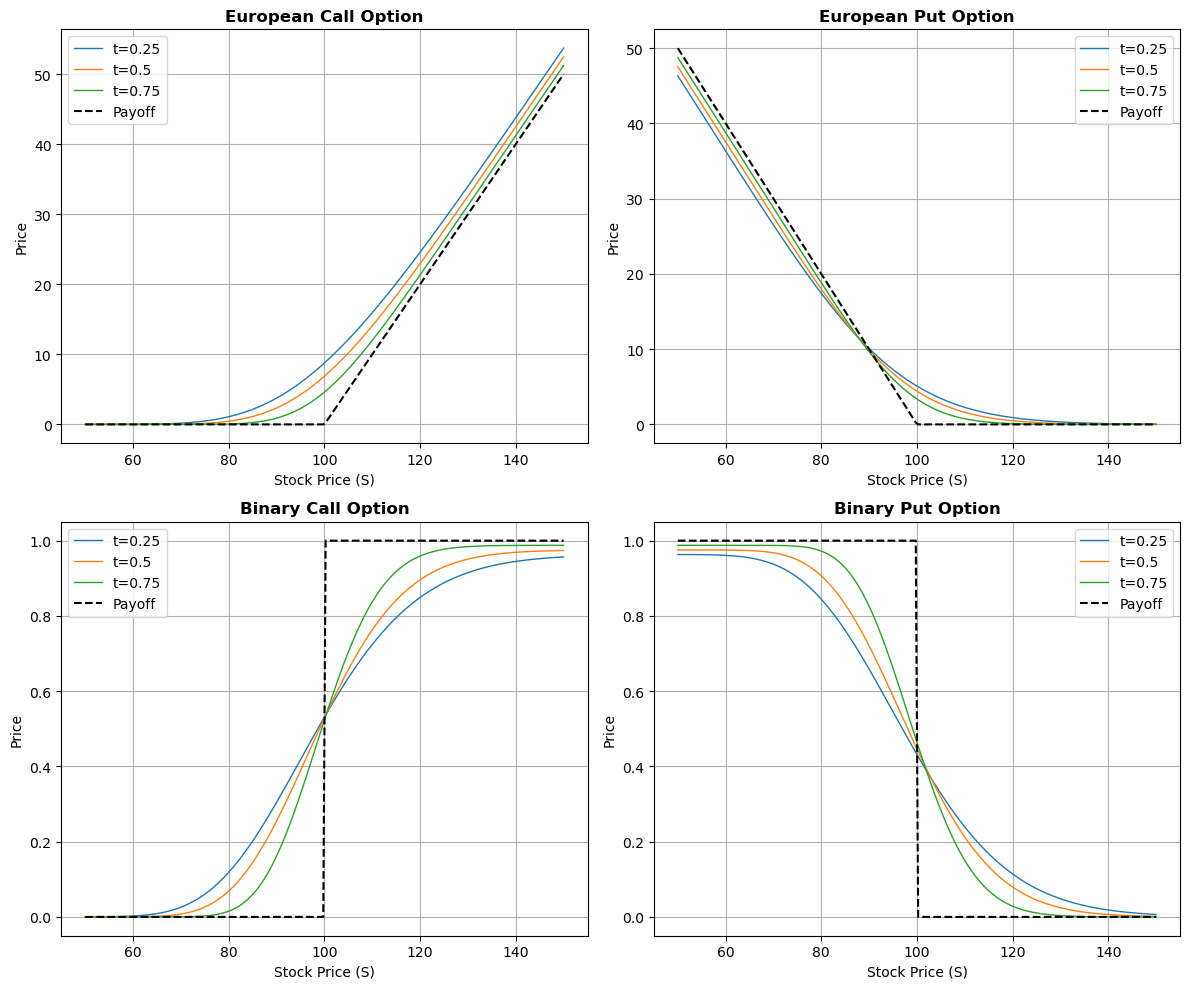

In [9]:
def plot_options(S_values:float, E: float, T: float, r:float, sigma:float, D, t_values):
    """
    Plots option prices and payoffs for given t values.
    
    Parameters:
    - S_values (array): Stock prices range
    - E (float): Strike price
    - T (float): Time to expiry
    - r (float): Risk-free interest rate
    - sigma (float): Volatility
    - t_values (float or list): Single or multiple t values to evaluate
    """
    # Ensure t_values is a list
    if not isinstance(t_values, list):
        t_values = [t_values]
    
    # Compute payoff functions (constant for all t)
    call_payoff = [max(S - E, 0) for S in S_values]
    put_payoff = [max(E - S, 0) for S in S_values]
    binary_call_payoff = [1 if S > E else 0 for S in S_values]
    binary_put_payoff = [1 if S < E else 0 for S in S_values]
    
    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Plot titles
    titles = ["European Call Option", "European Put Option", "Binary Call Option", "Binary Put Option"]
    y_labels = ["Price", "Price", "Price", "Price"]

    # Payoff functions
    payoffs = [call_payoff, put_payoff, binary_call_payoff, binary_put_payoff]
    option_functions = [
                        lambda S, t: black_scholes(S, E, T, t, r, sigma, D, "call"),
                        lambda S, t: black_scholes(S, E, T, t, r, sigma, D, "put"),
                        lambda S, t: binary_option(S, E, T, t, r, sigma, D, "call"),
                        lambda S, t: binary_option(S, E, T, t, r, sigma, D, "put"),
                       ]

    # Iterate through subplots
    for i, ax in enumerate(axs.flat):
        for t in t_values:
            # Compute option prices for the current t
            option_prices = [option_functions[i](S, t) for S in S_values]
            ax.plot(S_values, option_prices, label=f"t={t}", linewidth=1)

        # Add the payoff line
        ax.plot(S_values, payoffs[i], label="Payoff", linestyle="--", linewidth=1.5, color="black")
        ax.set_title(titles[i], fontweight="bold")
        ax.set_xlabel("Stock Price (S)")
        ax.set_ylabel(y_labels[i])
        ax.legend()
        ax.grid()

    plt.tight_layout()
    plt.show()


# Example usage
S_values = np.linspace(50, 150, 200)
E = 100
T = 1
r = 0.05
sigma = 0.2
D = 0

# Call plot_options function with a list of t values
plot_options(S_values, E, T, r, sigma, D, t_values=[0.25 ,0.5, 0.75])

### 3.2 3D Visualization of Option Price Behavior <a id="3.2"></a>

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Approach Taken and Code Explanation </p>

For both European and binary options, the code cell below creates 3D surface plots that show how option prices change with stock price and time to maturity. Using a new parameter named `European_or_Binary`, the **`plot_3d_surface_custom`** function generates a grid of stock price $S$ and time $t$ values, calculates the related option prices using either the binary option formula or the Black-Scholes formula (based on users input), and shows the results. A unique color scheme is selected, and the view angle for the calls is changed to provide a better visibility. This method draws attention to the pricing dynamics of each type of option, highlighting how time decay and underlying stock price movements affect their valuation. Please note that all the other parameters have taken the same value as per the example values given on the task description.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations from the plots </p>

**European Call Option Prices:**  
A larger chance of the option ending in-the-money is reflected in the European call option's price rising in tandem with the stock price. As the stock price rises above the strike price, this pattern is consistent with the option's intrinsic value growing. Furthermore, the option price increases as the time to maturity increases because of the additional time value, which permits more advantageous stock price fluctuations. When the stock price is close to the strike price, when there is the most uncertainty regarding the ultimate payout, the effect of time is more noticeable however if the time to maturity is large then the option price is more higher.

**European Put Option Prices:**  
As the stock price increases, the European put option's price falls, indicating a lower chance that the option will be in-the-money. The put's value is close to zero when the stock price is far higher than the strike price. On the other hand, the put price increases as the time to maturity increases because of the additional time value, which gives the stock price more chances to decline. When the stock price is near the strike price, where possible declines have a greater impact, therefore at this point the price of the option is cheaper.

**Binary Call Option Prices:**   
When the stock price rises over the strike price, the binary call option price shows a step-like pattern, getting closer to 1. This illustrates the all-or-nothing payoff structure of binary options. Time to maturity has little effect when the stock price is far from the strike price, but it is more apparent in the transition area close to the strike price, when there is the greatest degree of uncertainty over the result.

**Binary Put Option Prices:**  
The binary put option price similarly shows a step-like behavior, approaching 1 as the stock price drops below the strike price. This reflects the binary payout structure, where the option pays out fully if the stock price is below the strike. The influence of time to maturity is most visible near the strike price, where the probability of finishing in-the-money is highly sensitive to time.

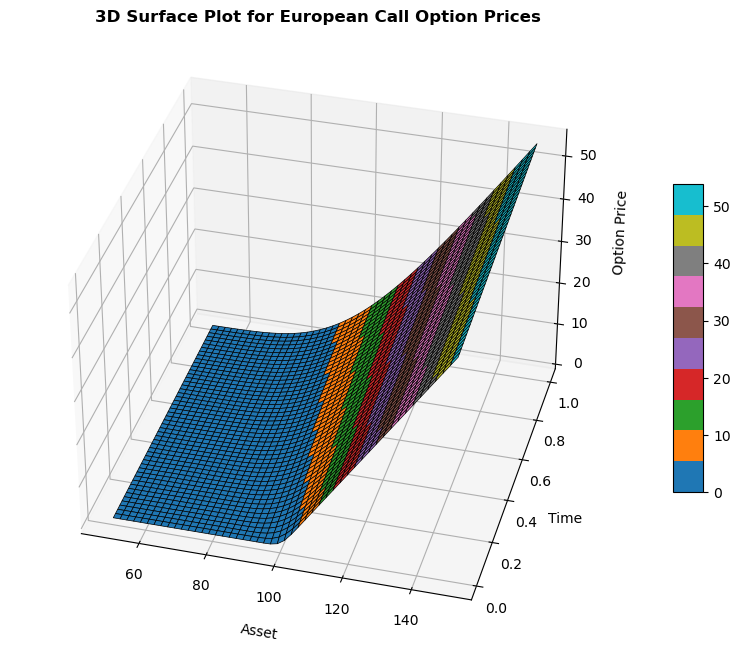

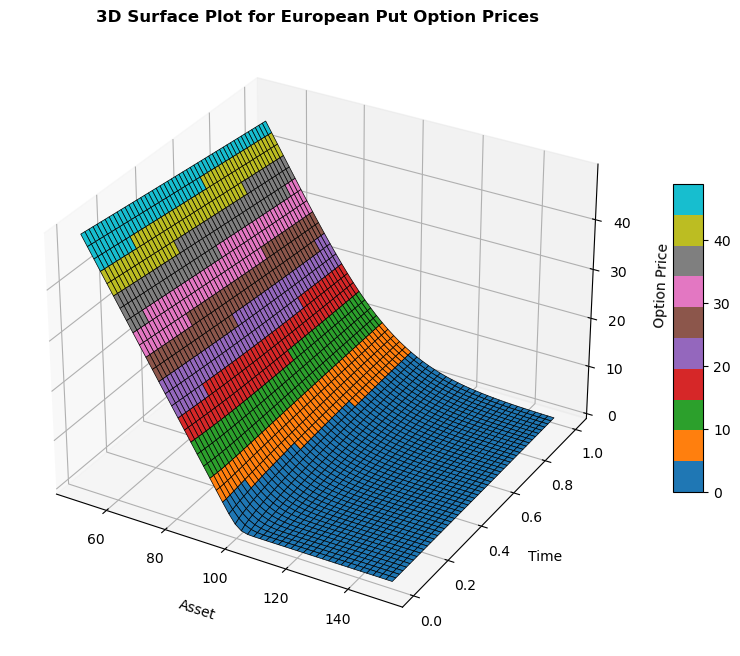

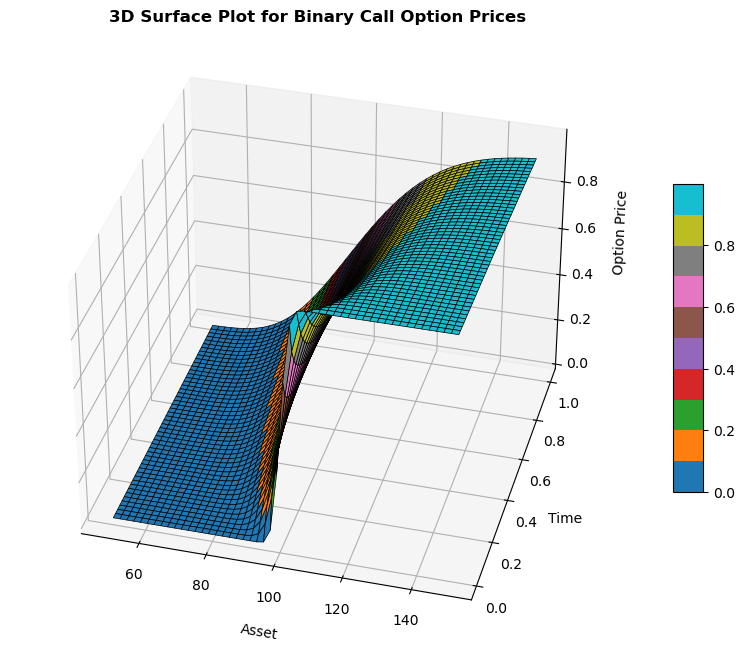

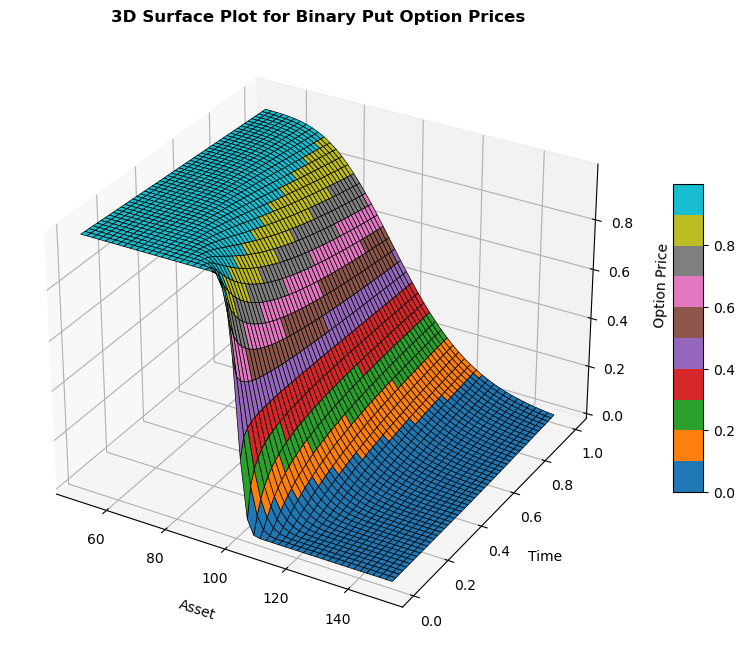

In [10]:
def plot_3d_surface_custom(S_values, t_values, E, T, r, sigma, D, option_type, European_or_Binary):
    """
    Create a 3D surface plot of option prices with stock price and time as variables, in a custom style.

    Parameters:
    - S_values (array): Stock prices range
    - t_values (array): Time to expiry values
    - E (float): Strike price
    - T (float): Time to expiry
    - r (float): Risk-free interest rate
    - sigma (float): Volatility
    - D (float): Dividend yield
    - option_type (str): "call" or "put" for option type
    - European_or_Binary (str): "European" or "Binary" to specify option type
    """
    # Create a grid of S and t values
    S, t = np.meshgrid(S_values, t_values)
    # Time to maturity
    to = T - t  
    # Avoid negative or zero 'to'
    to = np.maximum(to, 0.01)  

    # Compute option prices based on the option type
    if European_or_Binary == "European":
        prices = np.array([[
            black_scholes(S[i, j], E, T, t[i, j], r, sigma, D, option_type)
            for j in range(S.shape[1])]
            for i in range(S.shape[0])])
    elif European_or_Binary == "Binary":
        prices = np.array([[
            binary_option(S[i, j], E, T, t[i, j], r, sigma, D, option_type)
            for j in range(S.shape[1])]
            for i in range(S.shape[0])])
    else:
        raise ValueError("Invalid input for the European_or_Binary parameter. Use 'European' or 'Binary'.")

    # Custom 3D surface plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(S, to, prices, cmap='tab10', edgecolor='k', linewidth=0.5)
    ax.set_title(f"3D Surface Plot for {European_or_Binary} {option_type.capitalize()} Option Prices", fontweight="bold")
    ax.set_xlabel("Asset", labelpad=10)
    ax.set_ylabel("Time", labelpad=10)
    ax.set_zlabel("Option Price", labelpad=10)
    
    # Custom angle for better visibility of call option prices
    if option_type == "call":
        ax.view_init(35, -75)  
    
    fig.colorbar(surf, shrink=0.5, aspect=10)
    plt.show()


# Stock and time to maturity values
S_values = np.linspace(50, 150, 50)
t_values = np.linspace(0, 0.99, 50)

# Custom plot for European Call Option
plot_3d_surface_custom(S_values, t_values, E, T, r, sigma, D, option_type="call", European_or_Binary="European")
# Custom plot for European Put Option
plot_3d_surface_custom(S_values, t_values, E, T, r, sigma, D, option_type="put", European_or_Binary="European")
# Custom plot for Binary Call Option
plot_3d_surface_custom(S_values, t_values, E, T, r, sigma, D, option_type="call", European_or_Binary="Binary")
# Custom plot for Binary Put Option
plot_3d_surface_custom(S_values, t_values, E, T, r, sigma, D, option_type="put", European_or_Binary="Binary")

-----

## Conclusion <a id="Conclusion"></a>

The coursework included a thorough examination of numerical techniques and mathematical modeling in relation to European and Binary option pricing using the Black-Scholes model. I gained a deeper comprehension of numerical approximations and their importance in finance by putting the standard normal CDF into practice. The task showed how well polynomial approximations for the CDF work, enabling effective computations without the need for pre-made libraries. This implementation's precision and dependability were demonstrated by a thorough validation of its correctness against Python's built-in `scipy.stats.norm.cdf`.

I examined the effects of several factors, including stock price, strike price, volatility, time to maturity, interest rates, and dividends, on European and Binary options by applying the CDF to the Black-Scholes model. Important insights into how each parameter affects option pricing were revealed by the methodical adjustment of each parameter and the accompanying visualizations. This strategy demonstrated the effectiveness of numerical techniques in resolving actual financial issues while also reinforcing theoretical ideas. All things considered, this course illustrated how mathematical theory and computer methods work together to solve challenging problems in quantitative finance and more specifically in derivatives pricing.

---

## References <a id="References"></a>

**[1]** Dr Riaz Ahmad. Financial Products & Markets (2024) - Principles of Option Pricing

**[2]** Dr Riaz Ahmad. The Black Scholes Model (2024)